<a href="https://colab.research.google.com/github/OguzzCan/Housing-Price-Predictions-with-Melbourne-Housing-Datasett/blob/main/Housing_Price_Predictions_with_Melbourne_Housing_Dataset_ipynb_adl%C4%B1_not_defterinin_kopyas%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Some Key Details
-------------------
Suburb: Suburb

Address: Address

Rooms: Number of rooms

Price: Price in Australian dollars

Method:
-------------
S - property sold;

SP - property sold prior;

PI - property passed in;

PN - sold prior not disclosed;

SN - sold not disclosed;

NB - no bid;

VB - vendor bid;

W - withdrawn prior to auction;

SA - sold after auction;

SS - sold after auction price not disclosed.

N/A - price or highest bid not available.

Type:
----
br - bedroom(s);

h - house,cottage,villa, semi,terrace;

u - unit, duplex;

t - townhouse;

dev site - development site;

o res - other residential.

SellerG: Real Estate Agent

Date: Date sold

Distance: Distance from CBD in Kilometres

Regionname: General Region (West, North West, North, North east …etc)

Propertycount: Number of properties that exist in the suburb.

Bedroom2 : Scraped # of Bedrooms (from different source)

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size in Metres

BuildingArea: Building Size in Metres

YearBuilt: Year the house was built

CouncilArea: Governing council for the area

Lattitude: Self explanitory

Longtitude: Self explanitory

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import model_selection
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier  # Example of an ensemble method
from sklearn.linear_model import LinearRegression  # Example of a linear model
from sklearn.tree import DecisionTreeClassifier  # Example of a decision tree model
from sklearn.neighbors import KNeighborsClassifier  # Example of a k-nearest neighbors model

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.float_format',  '{:.2f}'.format)

This code imports the following libraries and modules:
------------------------------------------------------------
numpy (np alias): For numerical and array operations.

pandas (pd alias): For data manipulation and analysis.

seaborn (sns alias): For data visualization.

matplotlib.pyplot (plt alias): For creating plots and visualizations.
For modeling and evaluating machine learning models:

-------------------------------------------------------------

sklearn.model_selection: For model selection, cross-validation, and data splitting.

sklearn.metrics: For model evaluation metrics such as accuracy, precision, recall, etc.

sklearn.ensemble.RandomForestClassifier: An example of an ensemble learning method (Random Forest).

sklearn.linear_model.LinearRegression: An example of a linear regression model.

sklearn.tree.DecisionTreeClassifier: An example of a decision tree classifier.

sklearn.neighbors.KNeighborsClassifier: An example of a k-nearest neighbors classifier.

You can then use these libraries and modules for your data analysis, modeling, and evaluation tasks.




Veri Setini çekme

In [ ]:
file_path = "/kaggle/input/melbourne-housing-market/Melbourne_housing_FULL.csv"  # Dosya adını ve yolunu gerçek dosyanın yoluna uygun şekilde güncelleyin

# CSV dosyasını okuyun ve bir DataFrame'e yükleyin
df = pd.read_csv(file_path)
df_copy= df.copy()
df_copy.head()
df_copy.drop('Address', axis=1, inplace=True)
df_copy.drop('Bedroom2', axis=1, inplace=True)
df_copy

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,2,h,NaN,SS,Jellis,3/09/2016,2.50,3067.00,1.00,1.00,126.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
1,Abbotsford,2,h,1480000.00,S,Biggin,3/12/2016,2.50,3067.00,1.00,1.00,202.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
2,Abbotsford,2,h,1035000.00,S,Biggin,4/02/2016,2.50,3067.00,1.00,0.00,156.00,79.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00
3,Abbotsford,3,u,NaN,VB,Rounds,4/02/2016,2.50,3067.00,2.00,1.00,0.00,NaN,NaN,Yarra City Council,-37.81,145.01,Northern Metropolitan,4019.00
4,Abbotsford,3,h,1465000.00,SP,Biggin,4/03/2017,2.50,3067.00,2.00,0.00,134.00,150.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,4,h,1480000.00,PI,Jas,24/02/2018,6.30,3013.00,1.00,3.00,593.00,NaN,NaN,Maribyrnong City Council,-37.81,144.88,Western Metropolitan,6543.00
34853,Yarraville,2,h,888000.00,SP,Sweeney,24/02/2018,6.30,3013.00,2.00,1.00,98.00,104.00,2018.00,Maribyrnong City Council,-37.82,144.89,Western Metropolitan,6543.00
34854,Yarraville,2,t,705000.00,S,Jas,24/02/2018,6.30,3013.00,1.00,2.00,220.00,120.00,2000.00,Maribyrnong City Council,-37.82,144.88,Western Metropolitan,6543.00
34855,Yarraville,3,h,1140000.00,SP,hockingstuart,24/02/2018,6.30,3013.00,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.00


In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Rooms          34857 non-null  int64  
 2   Type           34857 non-null  object 
 3   Price          27247 non-null  float64
 4   Method         34857 non-null  object 
 5   SellerG        34857 non-null  object 
 6   Date           34857 non-null  object 
 7   Distance       34856 non-null  float64
 8   Postcode       34856 non-null  float64
 9   Bathroom       26631 non-null  float64
 10  Car            26129 non-null  float64
 11  Landsize       23047 non-null  float64
 12  BuildingArea   13742 non-null  float64
 13  YearBuilt      15551 non-null  float64
 14  CouncilArea    34854 non-null  object 
 15  Lattitude      26881 non-null  float64
 16  Longtitude     26881 non-null  float64
 17  Regionname     34854 non-null  object 
 18  Proper

In [ ]:
df_copy.isnull().sum()

Suburb               0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [ ]:
df_copy.duplicated().sum()

24

In [ ]:
null_satırlar = df_copy[df_copy["CouncilArea"].isnull()]
null_satırlar

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
18523,Footscray,2,u,710000.00,S,Jas,15/07/2017,5.10,3011.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26888,Camberwell,2,h,825000.00,VB,Jellis,11/11/2017,7.70,3124.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29483,Fawkner Lot,3,h,616000.00,SP,Brad,6/01/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_copy= df_copy.dropna(subset=['CouncilArea'])


In [ ]:
df_copy.isnull().sum()

Suburb               0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             0
Postcode             0
Bathroom          8223
Car               8725
Landsize         11807
BuildingArea     21112
YearBuilt        19303
CouncilArea          0
Lattitude         7973
Longtitude        7973
Regionname           0
Propertycount        0
dtype: int64

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34854 entries, 0 to 34856
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34854 non-null  object 
 1   Rooms          34854 non-null  int64  
 2   Type           34854 non-null  object 
 3   Price          27244 non-null  float64
 4   Method         34854 non-null  object 
 5   SellerG        34854 non-null  object 
 6   Date           34854 non-null  object 
 7   Distance       34854 non-null  float64
 8   Postcode       34854 non-null  float64
 9   Bathroom       26631 non-null  float64
 10  Car            26129 non-null  float64
 11  Landsize       23047 non-null  float64
 12  BuildingArea   13742 non-null  float64
 13  YearBuilt      15551 non-null  float64
 14  CouncilArea    34854 non-null  object 
 15  Lattitude      26881 non-null  float64
 16  Longtitude     26881 non-null  float64
 17  Regionname     34854 non-null  object 
 18  Propertycou

In [ ]:
df_copy.duplicated().sum()

24

In [ ]:
df_copy.loc[df_copy.duplicated(keep=False),:]

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1191,Balwyn North,4,h,NaN,SP,Marshall,28/05/2016,9.20,3104.00,NaN,NaN,NaN,NaN,NaN,Boroondara City Council,NaN,NaN,Southern Metropolitan,7809.00
1192,Balwyn North,4,h,NaN,SP,Marshall,28/05/2016,9.20,3104.00,NaN,NaN,NaN,NaN,NaN,Boroondara City Council,NaN,NaN,Southern Metropolitan,7809.00
2584,Burwood,4,t,1000050.00,S,Philip,18/06/2016,11.70,3125.00,NaN,NaN,NaN,NaN,NaN,Monash City Council,NaN,NaN,Southern Metropolitan,5678.00
2585,Burwood,4,t,1000050.00,S,Philip,18/06/2016,11.70,3125.00,NaN,NaN,NaN,NaN,NaN,Monash City Council,NaN,NaN,Southern Metropolitan,5678.00
2743,Camberwell,4,h,NaN,S,Marshall,22/05/2016,7.80,3124.00,NaN,NaN,NaN,NaN,NaN,Boroondara City Council,NaN,NaN,Southern Metropolitan,8920.00
2744,Camberwell,4,h,NaN,S,Marshall,22/05/2016,7.80,3124.00,NaN,NaN,NaN,NaN,NaN,Boroondara City Council,NaN,NaN,Southern Metropolitan,8920.00
2745,Camberwell,4,h,NaN,S,Marshall,22/05/2016,7.80,3124.00,NaN,NaN,NaN,NaN,NaN,Boroondara City Council,NaN,NaN,Southern Metropolitan,8920.00
6422,Malvern East,4,h,NaN,S,Jellis,17/09/2016,11.20,3145.00,NaN,NaN,NaN,NaN,NaN,Stonnington City Council,NaN,NaN,Southern Metropolitan,8801.00
6423,Malvern East,4,h,NaN,S,Jellis,17/09/2016,11.20,3145.00,NaN,NaN,NaN,NaN,NaN,Stonnington City Council,NaN,NaN,Southern Metropolitan,8801.00
6604,Maribyrnong,2,u,NaN,W,hockingstuart,22/05/2016,8.70,3032.00,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,4918.00


In [ ]:
df_copy.drop_duplicates()

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,2,h,NaN,SS,Jellis,3/09/2016,2.50,3067.00,1.00,1.00,126.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
1,Abbotsford,2,h,1480000.00,S,Biggin,3/12/2016,2.50,3067.00,1.00,1.00,202.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
2,Abbotsford,2,h,1035000.00,S,Biggin,4/02/2016,2.50,3067.00,1.00,0.00,156.00,79.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00
3,Abbotsford,3,u,NaN,VB,Rounds,4/02/2016,2.50,3067.00,2.00,1.00,0.00,NaN,NaN,Yarra City Council,-37.81,145.01,Northern Metropolitan,4019.00
4,Abbotsford,3,h,1465000.00,SP,Biggin,4/03/2017,2.50,3067.00,2.00,0.00,134.00,150.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,4,h,1480000.00,PI,Jas,24/02/2018,6.30,3013.00,1.00,3.00,593.00,NaN,NaN,Maribyrnong City Council,-37.81,144.88,Western Metropolitan,6543.00
34853,Yarraville,2,h,888000.00,SP,Sweeney,24/02/2018,6.30,3013.00,2.00,1.00,98.00,104.00,2018.00,Maribyrnong City Council,-37.82,144.89,Western Metropolitan,6543.00
34854,Yarraville,2,t,705000.00,S,Jas,24/02/2018,6.30,3013.00,1.00,2.00,220.00,120.00,2000.00,Maribyrnong City Council,-37.82,144.88,Western Metropolitan,6543.00
34855,Yarraville,3,h,1140000.00,SP,hockingstuart,24/02/2018,6.30,3013.00,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.00


In [ ]:
df_copy.duplicated().sum()

24

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34854 entries, 0 to 34856
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34854 non-null  object 
 1   Rooms          34854 non-null  int64  
 2   Type           34854 non-null  object 
 3   Price          27244 non-null  float64
 4   Method         34854 non-null  object 
 5   SellerG        34854 non-null  object 
 6   Date           34854 non-null  object 
 7   Distance       34854 non-null  float64
 8   Postcode       34854 non-null  float64
 9   Bathroom       26631 non-null  float64
 10  Car            26129 non-null  float64
 11  Landsize       23047 non-null  float64
 12  BuildingArea   13742 non-null  float64
 13  YearBuilt      15551 non-null  float64
 14  CouncilArea    34854 non-null  object 
 15  Lattitude      26881 non-null  float64
 16  Longtitude     26881 non-null  float64
 17  Regionname     34854 non-null  object 
 18  Propertycou

In [ ]:
df_copy.nunique()

Suburb             350
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

In [ ]:
# 'VeriSutunu' sütununu son dört hane olarak dönüştürün ve yeni bir sütun ekleyin
df_copy['Date'] = df_copy['Date'].str[-4:].astype(int)

/tmp/ipykernel_32/3610614469.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['Date'] = df_copy['Date'].str[-4:].astype(int)


In [ ]:
df_copy = df_copy.join(pd.get_dummies(df_copy.Type).astype(int)).drop(["Type"], axis=1)
df_copy = df_copy.join(pd.get_dummies(df_copy.Method).astype(int)).drop(["Method"], axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_copy['Suburb'] = label_encoder.fit_transform(df_copy['Suburb'])
df_copy['SellerG'] = label_encoder.fit_transform(df_copy['SellerG'])
df_copy['CouncilArea'] = label_encoder.fit_transform(df_copy['CouncilArea'])
df_copy['Regionname'] = label_encoder.fit_transform(df_copy['Regionname'])

df_copy

,Suburb,Rooms,Price,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,h,t,u,PI,PN,S,SA,SN,SP,SS,VB,W
0,0,2,NaN,155,2016,2.50,3067.00,1.00,1.00,126.00,NaN,NaN,31,-37.80,145.00,2,4019.00,1,0,0,0,0,0,0,0,0,1,0,0
1,0,2,1480000.00,33,2016,2.50,3067.00,1.00,1.00,202.00,NaN,NaN,31,-37.80,145.00,2,4019.00,1,0,0,0,0,1,0,0,0,0,0,0
2,0,2,1035000.00,33,2016,2.50,3067.00,1.00,0.00,156.00,79.00,1900.00,31,-37.81,144.99,2,4019.00,1,0,0,0,0,1,0,0,0,0,0,0
3,0,3,NaN,296,2016,2.50,3067.00,2.00,1.00,0.00,NaN,NaN,31,-37.81,145.01,2,4019.00,0,0,1,0,0,0,0,0,0,0,1,0
4,0,3,1465000.00,33,2017,2.50,3067.00,2.00,0.00,134.00,150.00,1900.00,31,-37.81,144.99,2,4019.00,1,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,347,4,1480000.00,152,2018,6.30,3013.00,1.00,3.00,593.00,NaN,NaN,16,-37.81,144.88,6,6543.00,1,0,0,1,0,0,0,0,0,0,0,0
34853,347,2,888000.00,321,2018,6.30,3013.00,2.00,1.00,98.00,104.00,2018.00,16,-37.82,144.89,6,6543.00,1,0,0,0,0,0,0,0,1,0,0,0
34854,347,2,705000.00,152,2018,6.30,3013.00,1.00,2.00,220.00,120.00,2000.00,16,-37.82,144.88,6,6543.00,0,1,0,0,0,1,0,0,0,0,0,0
34855,347,3,1140000.00,370,2018,6.30,3013.00,NaN,NaN,NaN,NaN,NaN,16,NaN,NaN,6,6543.00,1,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
#from scipy import stats
#z_scores = np.abs(stats.zscore(df_copy))
#threshold = 2.5
#filtered_data = df_copy[(z_scores < threshold).all(axis=1)]
#filtered_data.info()*/

# DEĞER TEMİZLEME


In [ ]:
df_copy.isnull().sum()

Suburb               0
Rooms                0
Price             7610
SellerG              0
Date                 0
Distance             0
Postcode             0
Bathroom          8223
Car               8725
Landsize         11807
BuildingArea     21112
YearBuilt        19303
CouncilArea          0
Lattitude         7973
Longtitude        7973
Regionname           0
Propertycount        0
h                    0
t                    0
u                    0
PI                   0
PN                   0
S                    0
SA                   0
SN                   0
SP                   0
SS                   0
VB                   0
W                    0
dtype: int64

In [ ]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Suburb,34854.00,170.95,100.13,0.00,78.00,170.00,260.00,349.00
Rooms,34854.00,3.03,0.97,1.00,2.00,3.00,4.00,16.00
Price,27244.00,1050210.03,641492.29,85000.00,635000.00,870000.00,1295000.00,11200000.00
SellerG,34854.00,184.64,110.28,0.00,101.00,198.00,275.00,387.00
Date,34854.00,2016.84,0.64,2016.00,2016.00,2017.00,2017.00,2018.00
Distance,34854.00,11.19,6.79,0.00,6.40,10.30,14.00,48.10
Postcode,34854.00,3116.07,109.03,3000.00,3051.00,3103.00,3156.00,3978.00
Bathroom,26631.00,1.62,0.72,0.00,1.00,2.00,2.00,12.00
Car,26129.00,1.73,1.01,0.00,1.00,2.00,2.00,26.00
Landsize,23047.00,593.60,3398.84,0.00,224.00,521.00,670.00,433014.00


7'Den fazla Null değeri taşıyan sütunları temizleme

In [ ]:
null_deger_sayisi = df_copy.isnull().sum(axis=1)

# Satırları filtreleyin: 2'den fazla null değere sahip olan satırları seçin
filtre = null_deger_sayisi > 7

# Filtreye uyan satırların indekslerini elde edin
filtrelenen_indeksler = df_copy[filtre].index

# Filtreye uyan satırları orijinal DataFrame'den çıkarın
df_copy = df_copy.drop(filtrelenen_indeksler)
df_copy

,Suburb,Rooms,Price,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,h,t,u,PI,PN,S,SA,SN,SP,SS,VB,W
0,0,2,NaN,155,2016,2.50,3067.00,1.00,1.00,126.00,NaN,NaN,31,-37.80,145.00,2,4019.00,1,0,0,0,0,0,0,0,0,1,0,0
1,0,2,1480000.00,33,2016,2.50,3067.00,1.00,1.00,202.00,NaN,NaN,31,-37.80,145.00,2,4019.00,1,0,0,0,0,1,0,0,0,0,0,0
2,0,2,1035000.00,33,2016,2.50,3067.00,1.00,0.00,156.00,79.00,1900.00,31,-37.81,144.99,2,4019.00,1,0,0,0,0,1,0,0,0,0,0,0
3,0,3,NaN,296,2016,2.50,3067.00,2.00,1.00,0.00,NaN,NaN,31,-37.81,145.01,2,4019.00,0,0,1,0,0,0,0,0,0,0,1,0
4,0,3,1465000.00,33,2017,2.50,3067.00,2.00,0.00,134.00,150.00,1900.00,31,-37.81,144.99,2,4019.00,1,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,347,4,1480000.00,152,2018,6.30,3013.00,1.00,3.00,593.00,NaN,NaN,16,-37.81,144.88,6,6543.00,1,0,0,1,0,0,0,0,0,0,0,0
34853,347,2,888000.00,321,2018,6.30,3013.00,2.00,1.00,98.00,104.00,2018.00,16,-37.82,144.89,6,6543.00,1,0,0,0,0,0,0,0,1,0,0,0
34854,347,2,705000.00,152,2018,6.30,3013.00,1.00,2.00,220.00,120.00,2000.00,16,-37.82,144.88,6,6543.00,0,1,0,0,0,1,0,0,0,0,0,0
34855,347,3,1140000.00,370,2018,6.30,3013.00,NaN,NaN,NaN,NaN,NaN,16,NaN,NaN,6,6543.00,1,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
categorical_columns = [
                       "Type",
                       "Method",
                       "Regionname"]
numeric_columns     = [
                       'Suburb',
                       'Address',
                       'Rooms',
                       'Price',
                       'SellerG',
                       'Date',
                       'Postcode',
                       'Propertycount',
                       'Distance',
                       'CouncilArea']


In [ ]:
# Sutunun ortalamasını hesaplayın
ortalama_deger = round(df_copy['Car'].mean())
# Boş değerleri ortalama değer ile doldurun
df_copy['Car'].fillna(ortalama_deger, inplace=True)
df_copy

,Suburb,Rooms,Price,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,h,t,u,PI,PN,S,SA,SN,SP,SS,VB,W
0,0,2,NaN,155,2016,2.50,3067.00,1.00,1.00,126.00,NaN,NaN,31,-37.80,145.00,2,4019.00,1,0,0,0,0,0,0,0,0,1,0,0
1,0,2,1480000.00,33,2016,2.50,3067.00,1.00,1.00,202.00,NaN,NaN,31,-37.80,145.00,2,4019.00,1,0,0,0,0,1,0,0,0,0,0,0
2,0,2,1035000.00,33,2016,2.50,3067.00,1.00,0.00,156.00,79.00,1900.00,31,-37.81,144.99,2,4019.00,1,0,0,0,0,1,0,0,0,0,0,0
3,0,3,NaN,296,2016,2.50,3067.00,2.00,1.00,0.00,NaN,NaN,31,-37.81,145.01,2,4019.00,0,0,1,0,0,0,0,0,0,0,1,0
4,0,3,1465000.00,33,2017,2.50,3067.00,2.00,0.00,134.00,150.00,1900.00,31,-37.81,144.99,2,4019.00,1,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,347,4,1480000.00,152,2018,6.30,3013.00,1.00,3.00,593.00,NaN,NaN,16,-37.81,144.88,6,6543.00,1,0,0,1,0,0,0,0,0,0,0,0
34853,347,2,888000.00,321,2018,6.30,3013.00,2.00,1.00,98.00,104.00,2018.00,16,-37.82,144.89,6,6543.00,1,0,0,0,0,0,0,0,1,0,0,0
34854,347,2,705000.00,152,2018,6.30,3013.00,1.00,2.00,220.00,120.00,2000.00,16,-37.82,144.88,6,6543.00,0,1,0,0,0,1,0,0,0,0,0,0
34855,347,3,1140000.00,370,2018,6.30,3013.00,NaN,2.00,NaN,NaN,NaN,16,NaN,NaN,6,6543.00,1,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
ortalama_deger = round(df_copy['Bathroom'].mean())
# Boş değerleri ortalama değer ile doldurun
df_copy['Bathroom'].fillna(ortalama_deger, inplace=True)
df_copy

,Suburb,Rooms,Price,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,h,t,u,PI,PN,S,SA,SN,SP,SS,VB,W
0,0,2,NaN,155,2016,2.50,3067.00,1.00,1.00,126.00,NaN,NaN,31,-37.80,145.00,2,4019.00,1,0,0,0,0,0,0,0,0,1,0,0
1,0,2,1480000.00,33,2016,2.50,3067.00,1.00,1.00,202.00,NaN,NaN,31,-37.80,145.00,2,4019.00,1,0,0,0,0,1,0,0,0,0,0,0
2,0,2,1035000.00,33,2016,2.50,3067.00,1.00,0.00,156.00,79.00,1900.00,31,-37.81,144.99,2,4019.00,1,0,0,0,0,1,0,0,0,0,0,0
3,0,3,NaN,296,2016,2.50,3067.00,2.00,1.00,0.00,NaN,NaN,31,-37.81,145.01,2,4019.00,0,0,1,0,0,0,0,0,0,0,1,0
4,0,3,1465000.00,33,2017,2.50,3067.00,2.00,0.00,134.00,150.00,1900.00,31,-37.81,144.99,2,4019.00,1,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,347,4,1480000.00,152,2018,6.30,3013.00,1.00,3.00,593.00,NaN,NaN,16,-37.81,144.88,6,6543.00,1,0,0,1,0,0,0,0,0,0,0,0
34853,347,2,888000.00,321,2018,6.30,3013.00,2.00,1.00,98.00,104.00,2018.00,16,-37.82,144.89,6,6543.00,1,0,0,0,0,0,0,0,1,0,0,0
34854,347,2,705000.00,152,2018,6.30,3013.00,1.00,2.00,220.00,120.00,2000.00,16,-37.82,144.88,6,6543.00,0,1,0,0,0,1,0,0,0,0,0,0
34855,347,3,1140000.00,370,2018,6.30,3013.00,2.00,2.00,NaN,NaN,NaN,16,NaN,NaN,6,6543.00,1,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
ortalama_deger = round(df_copy['YearBuilt'].mean())
# Boş değerleri ortalama değer ile doldurun
df_copy['YearBuilt'].fillna(ortalama_deger, inplace=True)
df_copy

,Suburb,Rooms,Price,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,h,t,u,PI,PN,S,SA,SN,SP,SS,VB,W
0,0,2,NaN,155,2016,2.50,3067.00,1.00,1.00,126.00,NaN,1965.00,31,-37.80,145.00,2,4019.00,1,0,0,0,0,0,0,0,0,1,0,0
1,0,2,1480000.00,33,2016,2.50,3067.00,1.00,1.00,202.00,NaN,1965.00,31,-37.80,145.00,2,4019.00,1,0,0,0,0,1,0,0,0,0,0,0
2,0,2,1035000.00,33,2016,2.50,3067.00,1.00,0.00,156.00,79.00,1900.00,31,-37.81,144.99,2,4019.00,1,0,0,0,0,1,0,0,0,0,0,0
3,0,3,NaN,296,2016,2.50,3067.00,2.00,1.00,0.00,NaN,1965.00,31,-37.81,145.01,2,4019.00,0,0,1,0,0,0,0,0,0,0,1,0
4,0,3,1465000.00,33,2017,2.50,3067.00,2.00,0.00,134.00,150.00,1900.00,31,-37.81,144.99,2,4019.00,1,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,347,4,1480000.00,152,2018,6.30,3013.00,1.00,3.00,593.00,NaN,1965.00,16,-37.81,144.88,6,6543.00,1,0,0,1,0,0,0,0,0,0,0,0
34853,347,2,888000.00,321,2018,6.30,3013.00,2.00,1.00,98.00,104.00,2018.00,16,-37.82,144.89,6,6543.00,1,0,0,0,0,0,0,0,1,0,0,0
34854,347,2,705000.00,152,2018,6.30,3013.00,1.00,2.00,220.00,120.00,2000.00,16,-37.82,144.88,6,6543.00,0,1,0,0,0,1,0,0,0,0,0,0
34855,347,3,1140000.00,370,2018,6.30,3013.00,2.00,2.00,NaN,NaN,1965.00,16,NaN,NaN,6,6543.00,1,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
ortalama_deger = round(df_copy['Price'].mean())
# Boş değerleri ortalama değer ile doldurun
df_copy['Price'].fillna(ortalama_deger, inplace=True)
df_copy

,Suburb,Rooms,Price,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,h,t,u,PI,PN,S,SA,SN,SP,SS,VB,W
0,0,2,1050210.00,155,2016,2.50,3067.00,1.00,1.00,126.00,NaN,1965.00,31,-37.80,145.00,2,4019.00,1,0,0,0,0,0,0,0,0,1,0,0
1,0,2,1480000.00,33,2016,2.50,3067.00,1.00,1.00,202.00,NaN,1965.00,31,-37.80,145.00,2,4019.00,1,0,0,0,0,1,0,0,0,0,0,0
2,0,2,1035000.00,33,2016,2.50,3067.00,1.00,0.00,156.00,79.00,1900.00,31,-37.81,144.99,2,4019.00,1,0,0,0,0,1,0,0,0,0,0,0
3,0,3,1050210.00,296,2016,2.50,3067.00,2.00,1.00,0.00,NaN,1965.00,31,-37.81,145.01,2,4019.00,0,0,1,0,0,0,0,0,0,0,1,0
4,0,3,1465000.00,33,2017,2.50,3067.00,2.00,0.00,134.00,150.00,1900.00,31,-37.81,144.99,2,4019.00,1,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,347,4,1480000.00,152,2018,6.30,3013.00,1.00,3.00,593.00,NaN,1965.00,16,-37.81,144.88,6,6543.00,1,0,0,1,0,0,0,0,0,0,0,0
34853,347,2,888000.00,321,2018,6.30,3013.00,2.00,1.00,98.00,104.00,2018.00,16,-37.82,144.89,6,6543.00,1,0,0,0,0,0,0,0,1,0,0,0
34854,347,2,705000.00,152,2018,6.30,3013.00,1.00,2.00,220.00,120.00,2000.00,16,-37.82,144.88,6,6543.00,0,1,0,0,0,1,0,0,0,0,0,0
34855,347,3,1140000.00,370,2018,6.30,3013.00,2.00,2.00,NaN,NaN,1965.00,16,NaN,NaN,6,6543.00,1,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
ortalama_deger = round(df_copy['Landsize'].mean())
# Boş değerleri ortalama değer ile doldurun
df_copy['Landsize'].fillna(ortalama_deger, inplace=True)
df_copy

,Suburb,Rooms,Price,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,h,t,u,PI,PN,S,SA,SN,SP,SS,VB,W
0,0,2,1050210.00,155,2016,2.50,3067.00,1.00,1.00,126.00,NaN,1965.00,31,-37.80,145.00,2,4019.00,1,0,0,0,0,0,0,0,0,1,0,0
1,0,2,1480000.00,33,2016,2.50,3067.00,1.00,1.00,202.00,NaN,1965.00,31,-37.80,145.00,2,4019.00,1,0,0,0,0,1,0,0,0,0,0,0
2,0,2,1035000.00,33,2016,2.50,3067.00,1.00,0.00,156.00,79.00,1900.00,31,-37.81,144.99,2,4019.00,1,0,0,0,0,1,0,0,0,0,0,0
3,0,3,1050210.00,296,2016,2.50,3067.00,2.00,1.00,0.00,NaN,1965.00,31,-37.81,145.01,2,4019.00,0,0,1,0,0,0,0,0,0,0,1,0
4,0,3,1465000.00,33,2017,2.50,3067.00,2.00,0.00,134.00,150.00,1900.00,31,-37.81,144.99,2,4019.00,1,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,347,4,1480000.00,152,2018,6.30,3013.00,1.00,3.00,593.00,NaN,1965.00,16,-37.81,144.88,6,6543.00,1,0,0,1,0,0,0,0,0,0,0,0
34853,347,2,888000.00,321,2018,6.30,3013.00,2.00,1.00,98.00,104.00,2018.00,16,-37.82,144.89,6,6543.00,1,0,0,0,0,0,0,0,1,0,0,0
34854,347,2,705000.00,152,2018,6.30,3013.00,1.00,2.00,220.00,120.00,2000.00,16,-37.82,144.88,6,6543.00,0,1,0,0,0,1,0,0,0,0,0,0
34855,347,3,1140000.00,370,2018,6.30,3013.00,2.00,2.00,594.00,NaN,1965.00,16,NaN,NaN,6,6543.00,1,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
ortalama_deger = round(df_copy['BuildingArea'].mean())
# Boş değerleri ortalama değer ile doldurun
df_copy['BuildingArea'].fillna(ortalama_deger, inplace=True)
df_copy

,Suburb,Rooms,Price,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,h,t,u,PI,PN,S,SA,SN,SP,SS,VB,W
0,0,2,1050210.00,155,2016,2.50,3067.00,1.00,1.00,126.00,160.00,1965.00,31,-37.80,145.00,2,4019.00,1,0,0,0,0,0,0,0,0,1,0,0
1,0,2,1480000.00,33,2016,2.50,3067.00,1.00,1.00,202.00,160.00,1965.00,31,-37.80,145.00,2,4019.00,1,0,0,0,0,1,0,0,0,0,0,0
2,0,2,1035000.00,33,2016,2.50,3067.00,1.00,0.00,156.00,79.00,1900.00,31,-37.81,144.99,2,4019.00,1,0,0,0,0,1,0,0,0,0,0,0
3,0,3,1050210.00,296,2016,2.50,3067.00,2.00,1.00,0.00,160.00,1965.00,31,-37.81,145.01,2,4019.00,0,0,1,0,0,0,0,0,0,0,1,0
4,0,3,1465000.00,33,2017,2.50,3067.00,2.00,0.00,134.00,150.00,1900.00,31,-37.81,144.99,2,4019.00,1,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,347,4,1480000.00,152,2018,6.30,3013.00,1.00,3.00,593.00,160.00,1965.00,16,-37.81,144.88,6,6543.00,1,0,0,1,0,0,0,0,0,0,0,0
34853,347,2,888000.00,321,2018,6.30,3013.00,2.00,1.00,98.00,104.00,2018.00,16,-37.82,144.89,6,6543.00,1,0,0,0,0,0,0,0,1,0,0,0
34854,347,2,705000.00,152,2018,6.30,3013.00,1.00,2.00,220.00,120.00,2000.00,16,-37.82,144.88,6,6543.00,0,1,0,0,0,1,0,0,0,0,0,0
34855,347,3,1140000.00,370,2018,6.30,3013.00,2.00,2.00,594.00,160.00,1965.00,16,NaN,NaN,6,6543.00,1,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
ortalama_deger = round(df_copy['Lattitude'].mean())
# Boş değerleri ortalama değer ile doldurun
df_copy['Lattitude'].fillna(ortalama_deger, inplace=True)
df_copy

,Suburb,Rooms,Price,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,h,t,u,PI,PN,S,SA,SN,SP,SS,VB,W
0,0,2,1050210.00,155,2016,2.50,3067.00,1.00,1.00,126.00,160.00,1965.00,31,-37.80,145.00,2,4019.00,1,0,0,0,0,0,0,0,0,1,0,0
1,0,2,1480000.00,33,2016,2.50,3067.00,1.00,1.00,202.00,160.00,1965.00,31,-37.80,145.00,2,4019.00,1,0,0,0,0,1,0,0,0,0,0,0
2,0,2,1035000.00,33,2016,2.50,3067.00,1.00,0.00,156.00,79.00,1900.00,31,-37.81,144.99,2,4019.00,1,0,0,0,0,1,0,0,0,0,0,0
3,0,3,1050210.00,296,2016,2.50,3067.00,2.00,1.00,0.00,160.00,1965.00,31,-37.81,145.01,2,4019.00,0,0,1,0,0,0,0,0,0,0,1,0
4,0,3,1465000.00,33,2017,2.50,3067.00,2.00,0.00,134.00,150.00,1900.00,31,-37.81,144.99,2,4019.00,1,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,347,4,1480000.00,152,2018,6.30,3013.00,1.00,3.00,593.00,160.00,1965.00,16,-37.81,144.88,6,6543.00,1,0,0,1,0,0,0,0,0,0,0,0
34853,347,2,888000.00,321,2018,6.30,3013.00,2.00,1.00,98.00,104.00,2018.00,16,-37.82,144.89,6,6543.00,1,0,0,0,0,0,0,0,1,0,0,0
34854,347,2,705000.00,152,2018,6.30,3013.00,1.00,2.00,220.00,120.00,2000.00,16,-37.82,144.88,6,6543.00,0,1,0,0,0,1,0,0,0,0,0,0
34855,347,3,1140000.00,370,2018,6.30,3013.00,2.00,2.00,594.00,160.00,1965.00,16,-38.00,NaN,6,6543.00,1,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
ortalama_deger = round(df_copy['Longtitude'].mean())
# Boş değerleri ortalama değer ile doldurun
df_copy['Longtitude'].fillna(ortalama_deger, inplace=True)
df_copy

,Suburb,Rooms,Price,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,h,t,u,PI,PN,S,SA,SN,SP,SS,VB,W
0,0,2,1050210.00,155,2016,2.50,3067.00,1.00,1.00,126.00,160.00,1965.00,31,-37.80,145.00,2,4019.00,1,0,0,0,0,0,0,0,0,1,0,0
1,0,2,1480000.00,33,2016,2.50,3067.00,1.00,1.00,202.00,160.00,1965.00,31,-37.80,145.00,2,4019.00,1,0,0,0,0,1,0,0,0,0,0,0
2,0,2,1035000.00,33,2016,2.50,3067.00,1.00,0.00,156.00,79.00,1900.00,31,-37.81,144.99,2,4019.00,1,0,0,0,0,1,0,0,0,0,0,0
3,0,3,1050210.00,296,2016,2.50,3067.00,2.00,1.00,0.00,160.00,1965.00,31,-37.81,145.01,2,4019.00,0,0,1,0,0,0,0,0,0,0,1,0
4,0,3,1465000.00,33,2017,2.50,3067.00,2.00,0.00,134.00,150.00,1900.00,31,-37.81,144.99,2,4019.00,1,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,347,4,1480000.00,152,2018,6.30,3013.00,1.00,3.00,593.00,160.00,1965.00,16,-37.81,144.88,6,6543.00,1,0,0,1,0,0,0,0,0,0,0,0
34853,347,2,888000.00,321,2018,6.30,3013.00,2.00,1.00,98.00,104.00,2018.00,16,-37.82,144.89,6,6543.00,1,0,0,0,0,0,0,0,1,0,0,0
34854,347,2,705000.00,152,2018,6.30,3013.00,1.00,2.00,220.00,120.00,2000.00,16,-37.82,144.88,6,6543.00,0,1,0,0,0,1,0,0,0,0,0,0
34855,347,3,1140000.00,370,2018,6.30,3013.00,2.00,2.00,594.00,160.00,1965.00,16,-38.00,145.00,6,6543.00,1,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
df_copy.isnull().sum()

Suburb           0
Rooms            0
Price            0
SellerG          0
Date             0
Distance         0
Postcode         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
h                0
t                0
u                0
PI               0
PN               0
S                0
SA               0
SN               0
SP               0
SS               0
VB               0
W                0
dtype: int64

In [ ]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Suburb,33136.00,171.35,100.19,0.00,78.00,172.00,261.00,349.00
Rooms,33136.00,3.04,0.97,1.00,2.00,3.00,4.00,16.00
Price,33136.00,1050210.03,581668.33,85000.00,680000.00,1005000.00,1189000.00,11200000.00
SellerG,33136.00,184.91,110.43,0.00,101.00,198.00,275.00,387.00
Date,33136.00,2016.84,0.64,2016.00,2016.00,2017.00,2017.00,2018.00
Distance,33136.00,11.22,6.80,0.00,6.40,10.30,14.00,48.10
Postcode,33136.00,3115.75,109.53,3000.00,3048.00,3102.00,3156.00,3978.00
Bathroom,33136.00,1.70,0.67,0.00,1.00,2.00,2.00,12.00
Car,33136.00,1.79,0.90,0.00,1.00,2.00,2.00,26.00
Landsize,33136.00,593.72,2834.56,0.00,336.00,594.00,607.00,433014.00


Tekrar eden değer oluştu mu tespit etme:

In [ ]:
df_copy.duplicated().sum()

53

Tekrar eden verileri silme

In [ ]:
df_copy.drop_duplicates()

,Suburb,Rooms,Price,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,h,t,u,PI,PN,S,SA,SN,SP,SS,VB,W
0,0,2,1050210.00,155,2016,2.50,3067.00,1.00,1.00,126.00,160.00,1965.00,31,-37.80,145.00,2,4019.00,1,0,0,0,0,0,0,0,0,1,0,0
1,0,2,1480000.00,33,2016,2.50,3067.00,1.00,1.00,202.00,160.00,1965.00,31,-37.80,145.00,2,4019.00,1,0,0,0,0,1,0,0,0,0,0,0
2,0,2,1035000.00,33,2016,2.50,3067.00,1.00,0.00,156.00,79.00,1900.00,31,-37.81,144.99,2,4019.00,1,0,0,0,0,1,0,0,0,0,0,0
3,0,3,1050210.00,296,2016,2.50,3067.00,2.00,1.00,0.00,160.00,1965.00,31,-37.81,145.01,2,4019.00,0,0,1,0,0,0,0,0,0,0,1,0
4,0,3,1465000.00,33,2017,2.50,3067.00,2.00,0.00,134.00,150.00,1900.00,31,-37.81,144.99,2,4019.00,1,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,347,4,1480000.00,152,2018,6.30,3013.00,1.00,3.00,593.00,160.00,1965.00,16,-37.81,144.88,6,6543.00,1,0,0,1,0,0,0,0,0,0,0,0
34853,347,2,888000.00,321,2018,6.30,3013.00,2.00,1.00,98.00,104.00,2018.00,16,-37.82,144.89,6,6543.00,1,0,0,0,0,0,0,0,1,0,0,0
34854,347,2,705000.00,152,2018,6.30,3013.00,1.00,2.00,220.00,120.00,2000.00,16,-37.82,144.88,6,6543.00,0,1,0,0,0,1,0,0,0,0,0,0
34855,347,3,1140000.00,370,2018,6.30,3013.00,2.00,2.00,594.00,160.00,1965.00,16,-38.00,145.00,6,6543.00,1,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
df_copy


,Suburb,Rooms,Price,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,h,t,u,PI,PN,S,SA,SN,SP,SS,VB,W
0,0,2,1050210.00,155,2016,2.50,3067.00,1.00,1.00,126.00,160.00,1965.00,31,-37.80,145.00,2,4019.00,1,0,0,0,0,0,0,0,0,1,0,0
1,0,2,1480000.00,33,2016,2.50,3067.00,1.00,1.00,202.00,160.00,1965.00,31,-37.80,145.00,2,4019.00,1,0,0,0,0,1,0,0,0,0,0,0
2,0,2,1035000.00,33,2016,2.50,3067.00,1.00,0.00,156.00,79.00,1900.00,31,-37.81,144.99,2,4019.00,1,0,0,0,0,1,0,0,0,0,0,0
3,0,3,1050210.00,296,2016,2.50,3067.00,2.00,1.00,0.00,160.00,1965.00,31,-37.81,145.01,2,4019.00,0,0,1,0,0,0,0,0,0,0,1,0
4,0,3,1465000.00,33,2017,2.50,3067.00,2.00,0.00,134.00,150.00,1900.00,31,-37.81,144.99,2,4019.00,1,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,347,4,1480000.00,152,2018,6.30,3013.00,1.00,3.00,593.00,160.00,1965.00,16,-37.81,144.88,6,6543.00,1,0,0,1,0,0,0,0,0,0,0,0
34853,347,2,888000.00,321,2018,6.30,3013.00,2.00,1.00,98.00,104.00,2018.00,16,-37.82,144.89,6,6543.00,1,0,0,0,0,0,0,0,1,0,0,0
34854,347,2,705000.00,152,2018,6.30,3013.00,1.00,2.00,220.00,120.00,2000.00,16,-37.82,144.88,6,6543.00,0,1,0,0,0,1,0,0,0,0,0,0
34855,347,3,1140000.00,370,2018,6.30,3013.00,2.00,2.00,594.00,160.00,1965.00,16,-38.00,145.00,6,6543.00,1,0,0,0,0,0,0,0,1,0,0,0


# Z-score

In [ ]:
from scipy import stats
# Z-puanlarını hesaplayın
z_scores = np.abs(stats.zscore(df_copy))

# Eşik değerini belirleyin (örneğin, 2.5 veya 3 gibi bir değer)
threshold = 2.5

# Eşik değerini aşan aykırı değerleri filtreleyin
filtered_data = df_copy[(z_scores < threshold).all(axis=1)]

# Aykırı değerlerden arındırılmış veriyi gösterin
print(filtered_data)

       Suburb  Rooms      Price  SellerG  Date  Distance  Postcode  Bathroom  Car  Landsize  BuildingArea  YearBuilt  CouncilArea  Lattitude  Longtitude  Regionname  Propertycount  h  t  u  PI  PN  S  SA  SN  SP  SS  VB  W
1           0      2 1480000.00       33  2016      2.50   3067.00      1.00 1.00    202.00        160.00    1965.00           31     -37.80      145.00           2        4019.00  1  0  0   0   0  1   0   0   0   0   0  0
10          0      2  941000.00      155  2016      2.50   3067.00      1.00 0.00    181.00        160.00    1965.00           31     -37.80      145.00           2        4019.00  1  0  0   0   0  1   0   0   0   0   0  0
11          0      3 1876000.00      227  2016      2.50   3067.00      2.00 0.00    245.00        210.00    1910.00           31     -37.80      145.00           2        4019.00  1  0  0   0   0  1   0   0   0   0   0  0
15          0      3 1000000.00      155  2016      2.50   3067.00      2.00 2.00    594.00        160.00   

# Eğitim

In [ ]:
from sklearn.model_selection import train_test_split

x = df_copy.drop(["Price"],axis=1)
y = df_copy["Price"]
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2 ,random_state=42)
train_data=X_train.join(y_train)
train_data

,Suburb,Rooms,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,h,t,u,PI,PN,S,SA,SN,SP,SS,VB,W,Price
32579,112,4,23,2018,12.40,3108.00,2.00,2.00,662.00,160.00,1965.00,15,-37.78,145.14,0,9028.00,1,0,0,0,0,0,0,0,1,0,0,0,1050210.00
14176,312,4,275,2017,4.60,3142.00,2.00,2.00,815.00,160.00,1965.00,27,-37.84,145.01,5,7217.00,1,0,0,1,0,0,0,0,0,0,0,0,3600000.00
24427,150,4,155,2017,16.70,3150.00,2.00,2.00,689.00,160.00,1965.00,21,-37.86,145.16,0,15321.00,1,0,0,0,0,1,0,0,0,0,0,0,1050210.00
34120,78,4,50,2018,17.90,3192.00,2.00,2.00,594.00,160.00,1965.00,1,-38.00,145.00,5,9758.00,1,0,0,0,0,0,0,0,1,0,0,0,1125000.00
13215,211,2,124,2017,2.80,3000.00,2.00,2.00,594.00,160.00,1965.00,18,-38.00,145.00,2,17496.00,0,0,1,0,0,1,0,0,0,0,0,0,637500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17682,236,2,277,2017,6.20,3015.00,1.00,1.00,290.00,105.00,1950.00,10,-37.85,144.89,6,5498.00,1,0,0,0,1,0,0,0,0,0,0,0,1050210.00
6588,208,2,370,2016,8.70,3032.00,1.00,1.00,0.00,99.00,1965.00,16,-37.77,144.90,6,4918.00,1,0,0,0,0,1,0,0,0,0,0,0,335000.00
11818,332,3,321,2017,8.20,3012.00,1.00,4.00,1000.00,85.00,1930.00,16,-37.79,144.86,6,5058.00,1,0,0,0,0,1,0,0,0,0,0,0,1575000.00
901,22,2,70,2016,9.70,3103.00,1.00,1.00,121.00,100.00,1960.00,2,-37.81,145.09,5,5682.00,0,1,0,0,0,1,0,0,0,0,0,0,760000.00


array([[<Axes: title={'center': 'Suburb'}>,
        <Axes: title={'center': 'Rooms'}>,
        <Axes: title={'center': 'SellerG'}>,
        <Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'Distance'}>],
       [<Axes: title={'center': 'Postcode'}>,
        <Axes: title={'center': 'Bathroom'}>,
        <Axes: title={'center': 'Car'}>,
        <Axes: title={'center': 'Landsize'}>,
        <Axes: title={'center': 'BuildingArea'}>],
       [<Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'CouncilArea'}>,
        <Axes: title={'center': 'Lattitude'}>,
        <Axes: title={'center': 'Longtitude'}>,
        <Axes: title={'center': 'Regionname'}>],
       [<Axes: title={'center': 'Propertycount'}>,
        <Axes: title={'center': 'h'}>, <Axes: title={'center': 't'}>,
        <Axes: title={'center': 'u'}>, <Axes: title={'center': 'PI'}>],
       [<Axes: title={'center': 'PN'}>, <Axes: title={'center': 'S'}>,
        <Axes: title={'center': 'SA'}>, <Axes

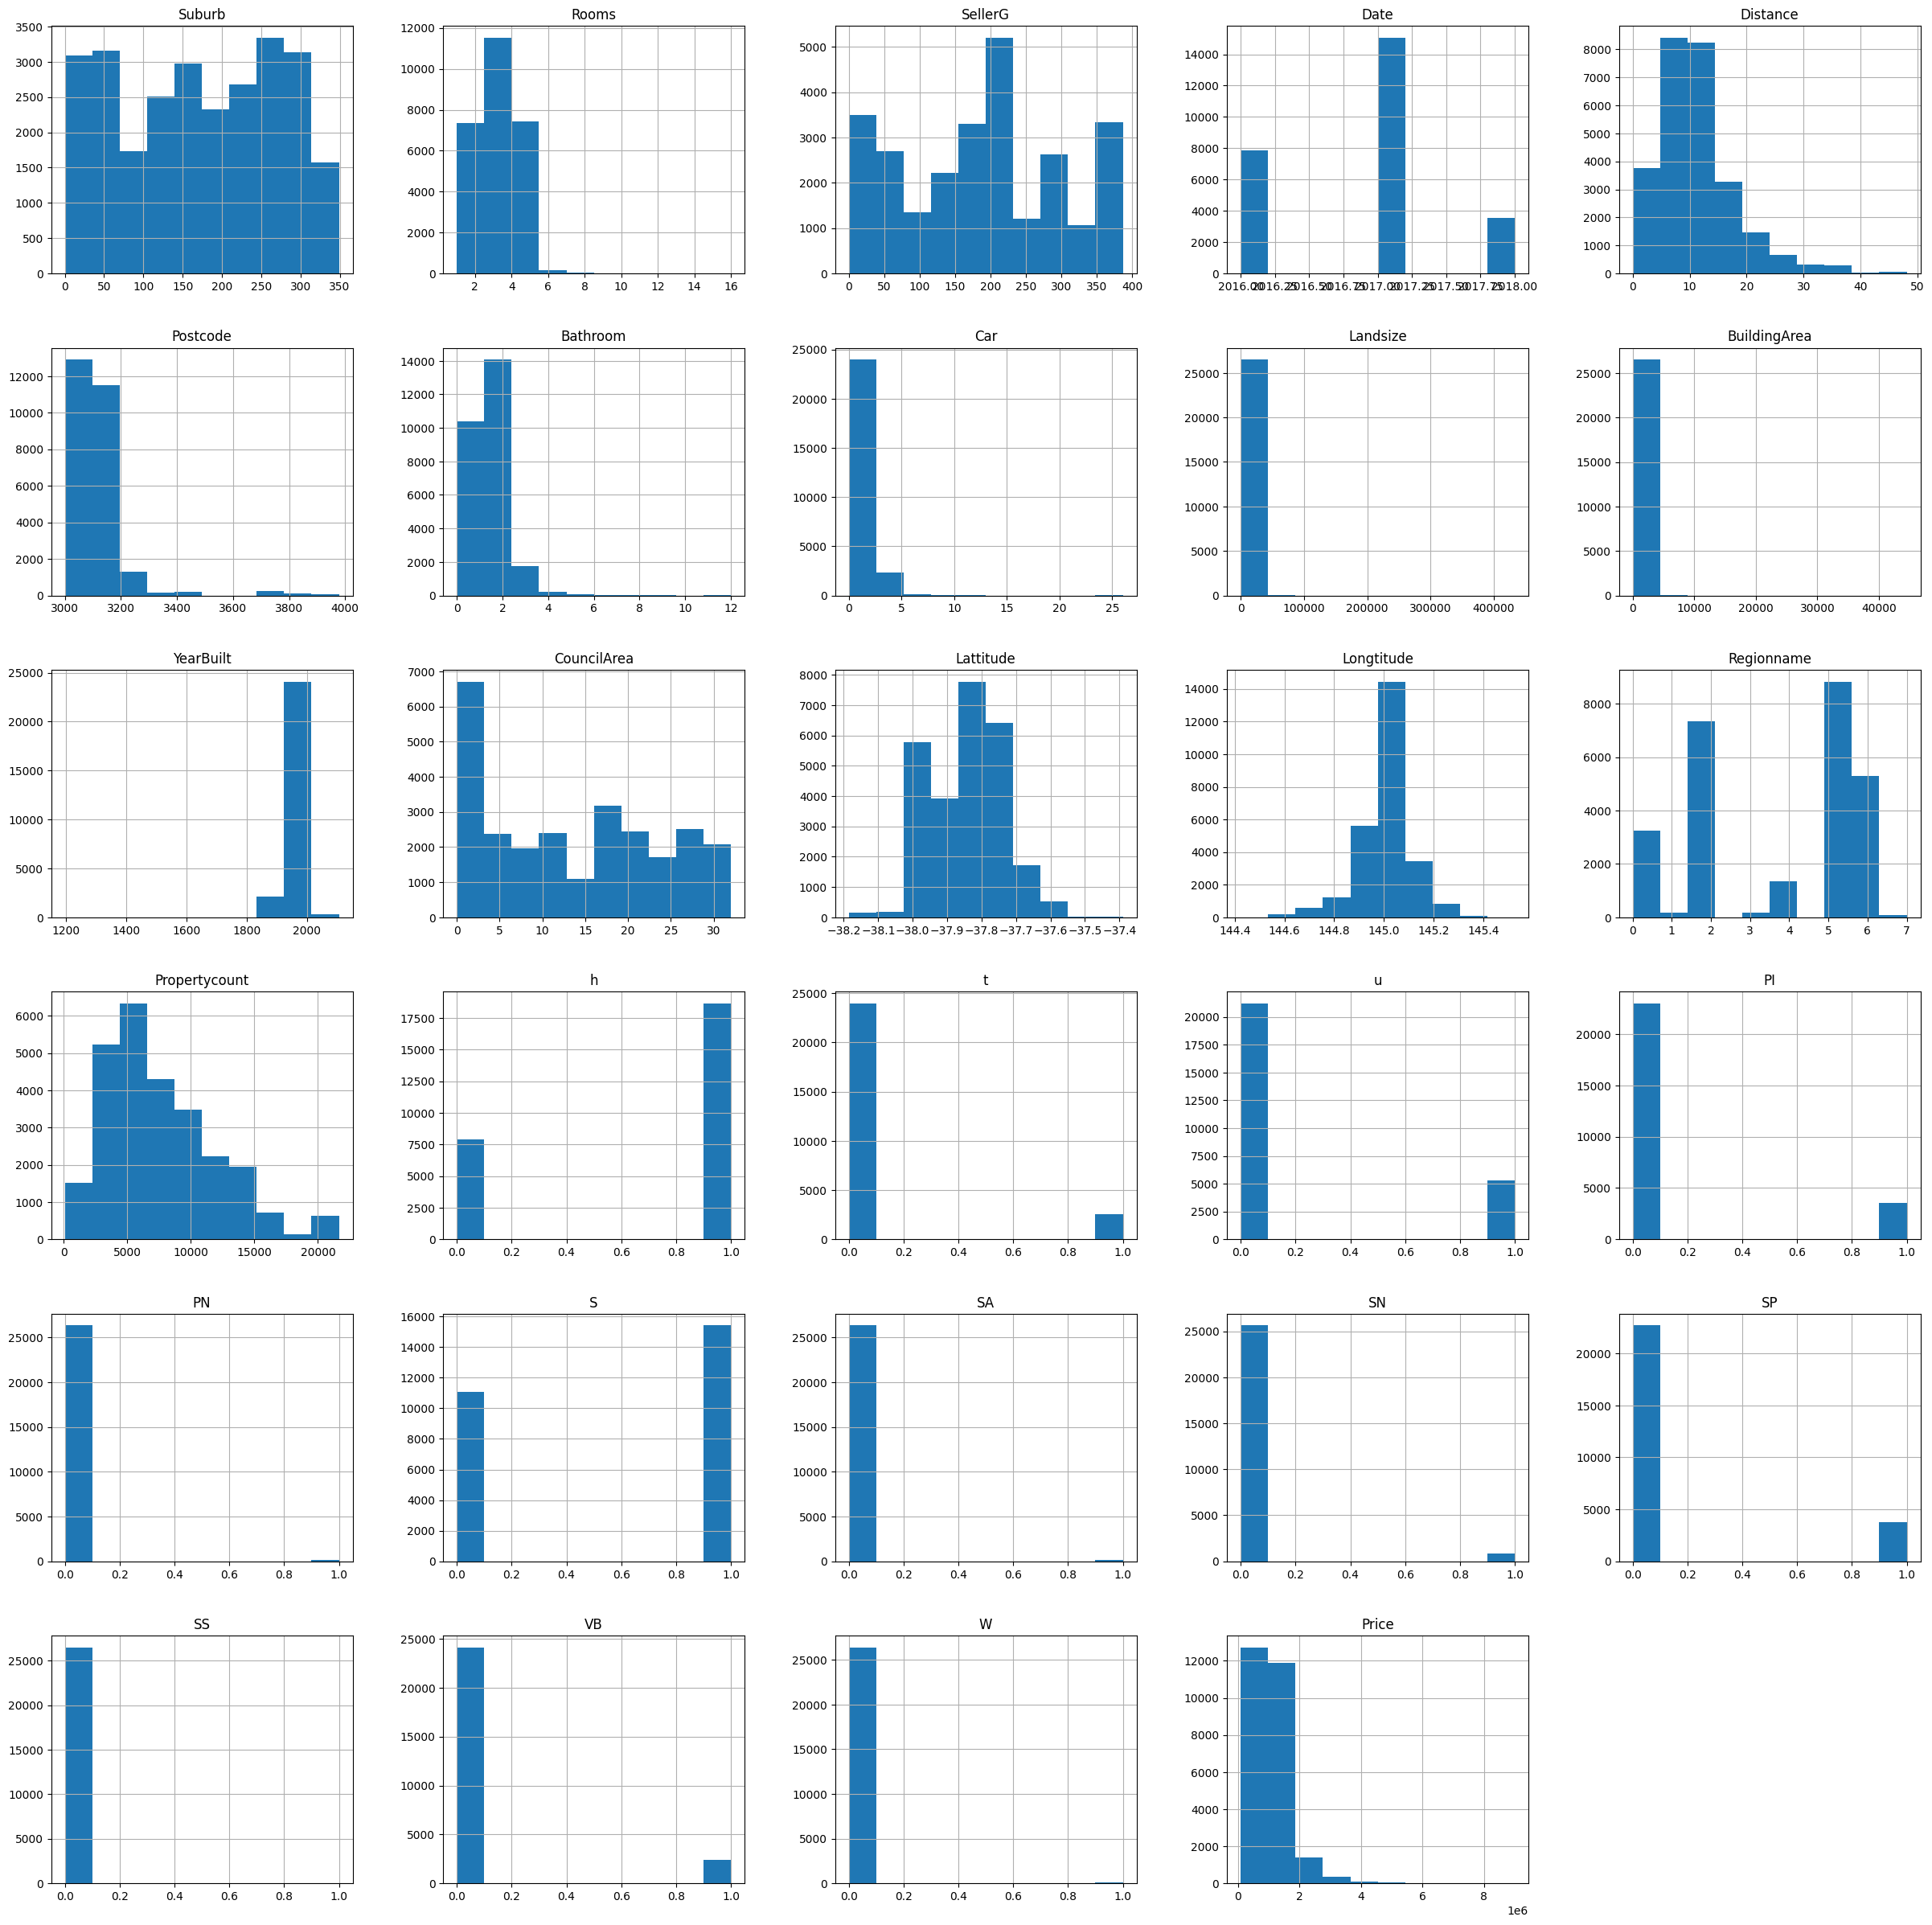

In [ ]:
train_data.hist(figsize=(30,30))

<Axes: >

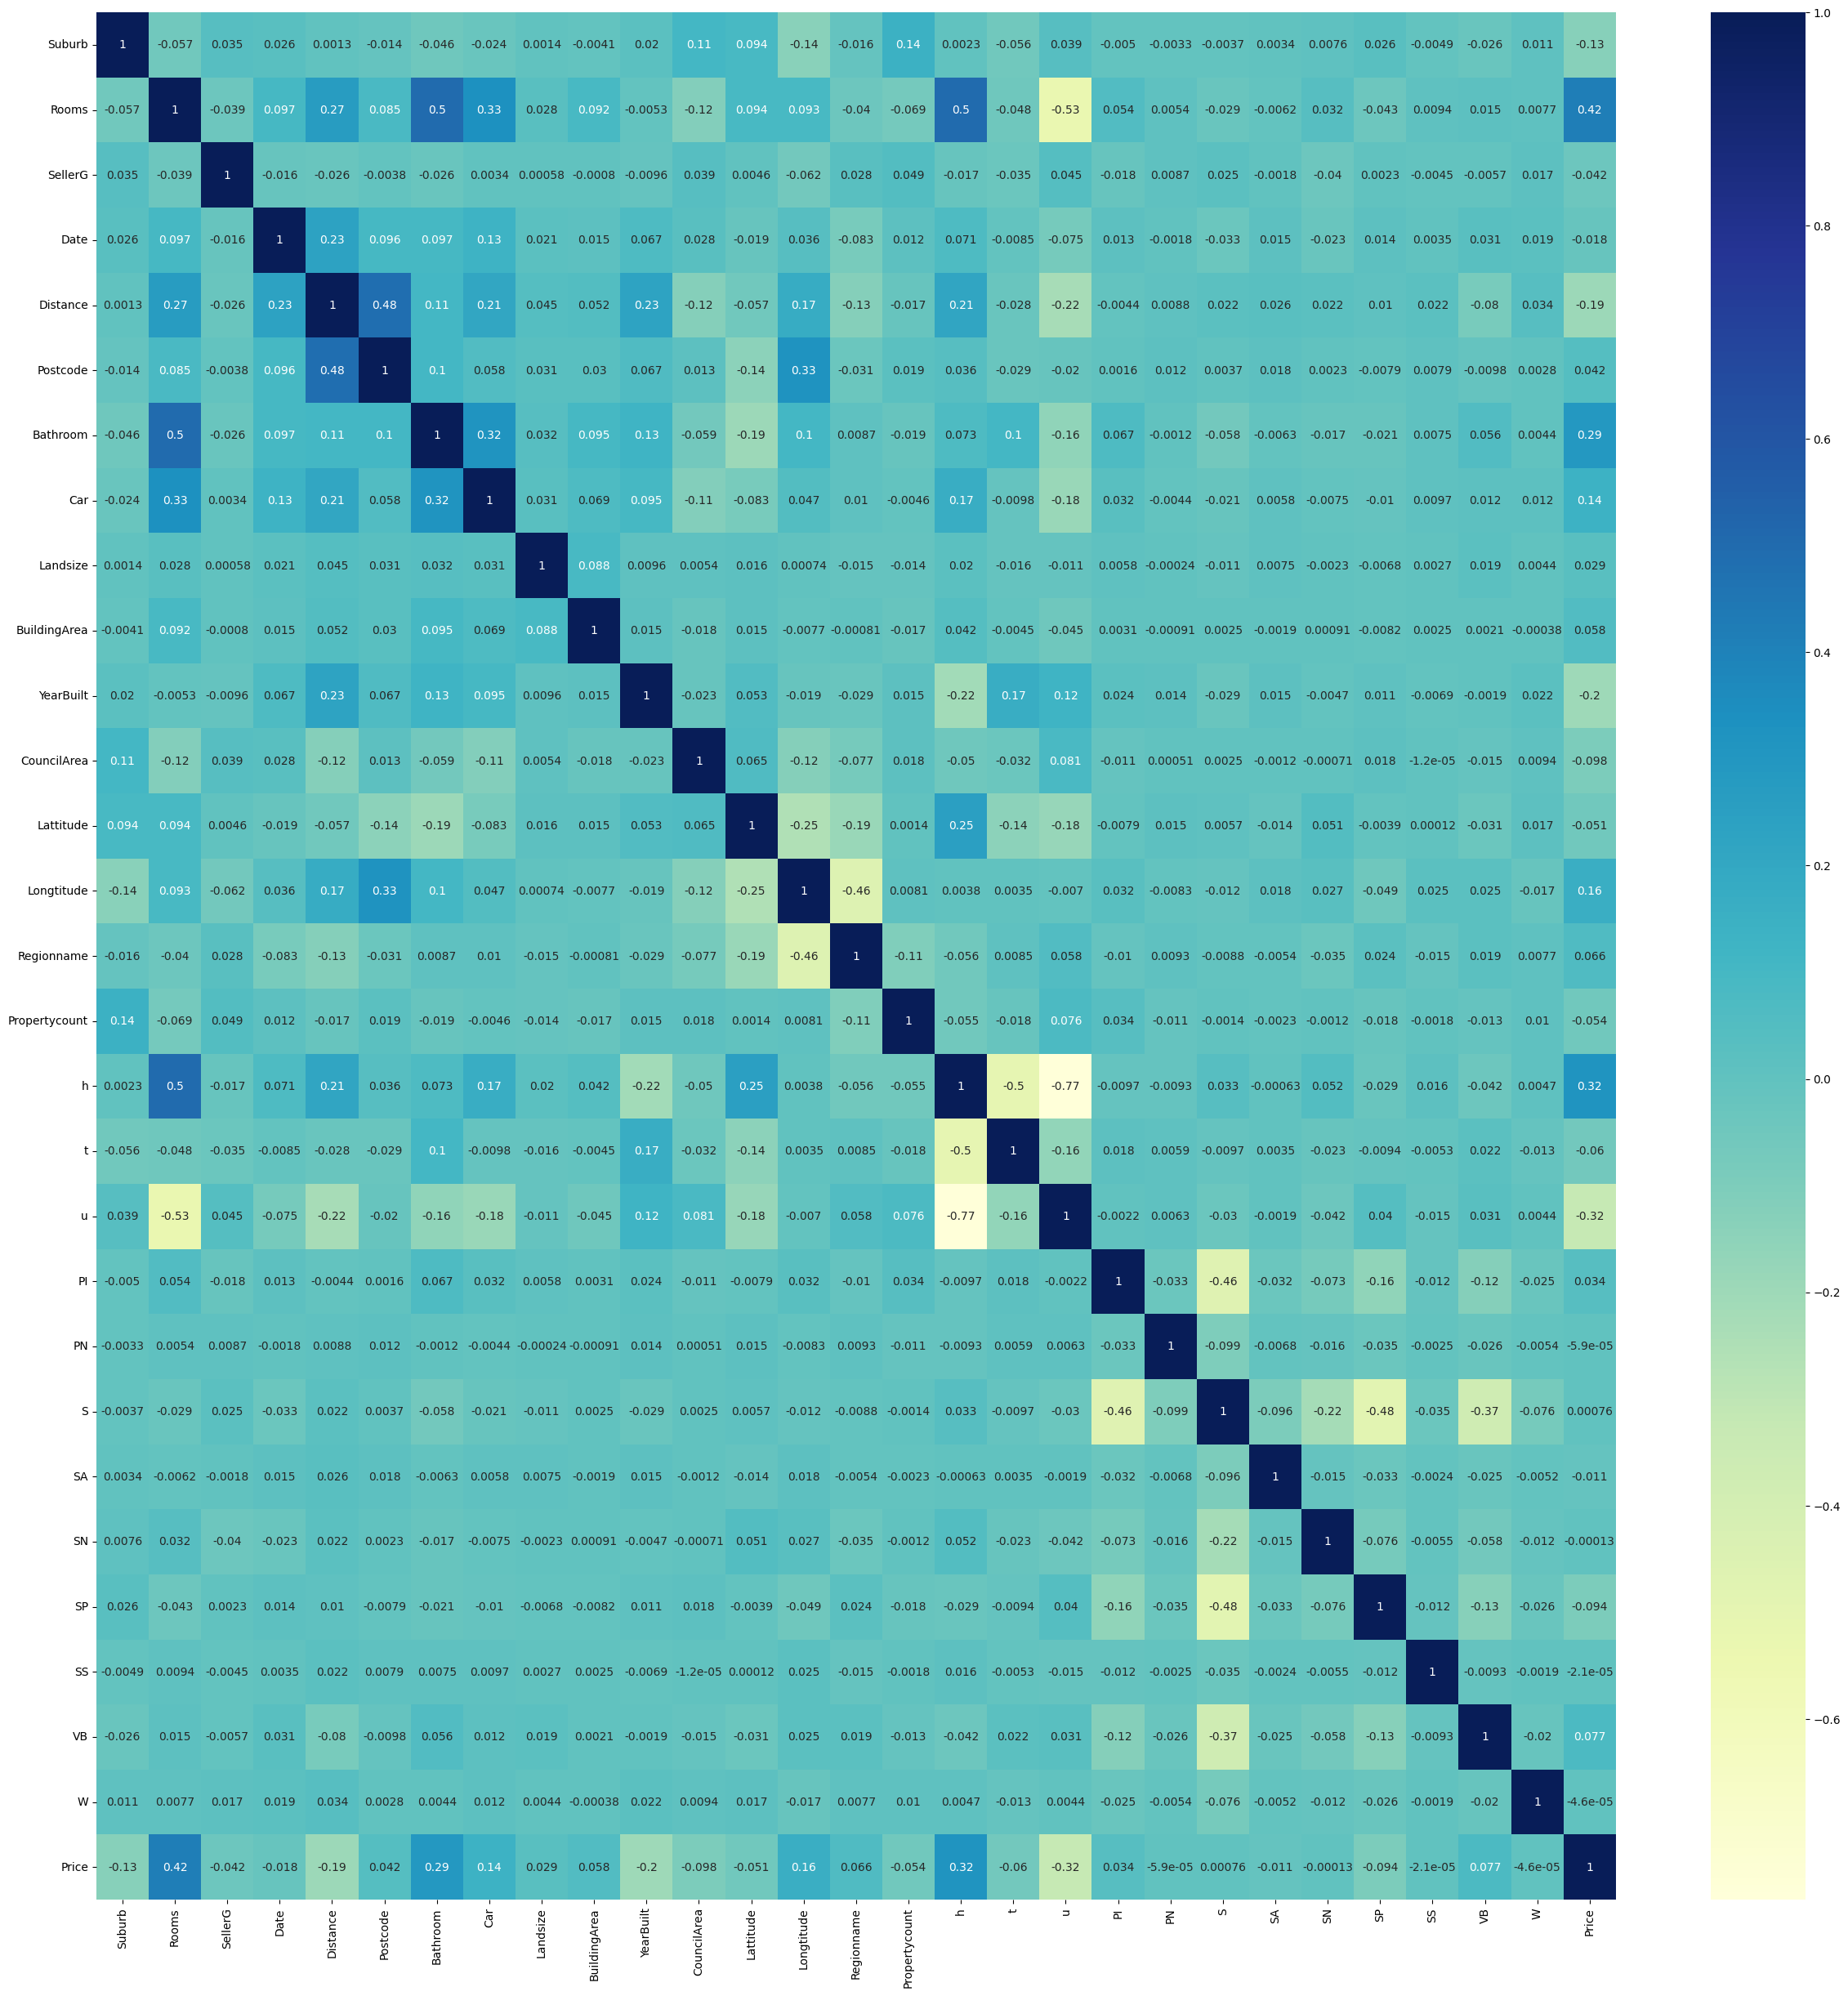

In [ ]:
plt.figure(figsize=(30,30))
sns.heatmap(train_data.corr(), annot=True , cmap="YlGnBu")

In [ ]:
from sklearn.linear_model import Lasso, LinearRegression, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor


# Train models
models = {

    'Lasso': {
'model': Lasso()
},

    'LinearRegression': {
'model': LinearRegression()
},

    'Ridge': {
'model': Ridge()
},

    'ElasticNet': {
'model': ElasticNet()
},

    'KNeighborsRegressor': {
'model': KNeighborsRegressor()
},

    'RandomForestRegressor': {
'model': RandomForestRegressor()
},

    'GradientBoostingRegressor': {
'model': GradientBoostingRegressor()
},

    'AdaBoostRegressor': {
'model': AdaBoostRegressor(n_estimators = 5, learning_rate = 1.2, loss = 'exponential', random_state = 2)
},
}

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


for model_name, model_info in models.items():
    model = model_info['model']
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)


    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f'{model_name} Metrikleri:')
    print(f'MAE: {mae}')
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print(f'R^2: {r2}\n')

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.716e+12, tolerance: 8.808e+11
  model = cd_fast.enet_coordinate_descent(


Lasso Metrikleri:
MAE: 297329.4647214286
MSE: 219923331666.36865
RMSE: 468959.8401423822
R^2: 0.3933193113168906

LinearRegression Metrikleri:
MAE: 297329.64758452534
MSE: 219923034399.19778
RMSE: 468959.52319917525
R^2: 0.3933201313583594

Ridge Metrikleri:
MAE: 297333.01245081535
MSE: 219927182537.29047
RMSE: 468963.94588208
R^2: 0.39330868830110965

ElasticNet Metrikleri:
MAE: 313928.871822691
MSE: 241213774442.39258
RMSE: 491135.189578585
R^2: 0.3345874778735827

KNeighborsRegressor Metrikleri:
MAE: 294037.8837960169
MSE: 227261074469.7633
RMSE: 476719.07290328055
R^2: 0.37307740781528154

RandomForestRegressor Metrikleri:
MAE: 215001.8821610012
MSE: 139628706496.84277
RMSE: 373669.2474593578
R^2: 0.6148201321997777

GradientBoostingRegressor Metrikleri:
MAE: 238446.94313407945
MSE: 164765956009.67386
RMSE: 405913.729762463
R^2: 0.5454764944397844

AdaBoostRegressor Metrikleri:
MAE: 341212.051423428
MSE: 241942344592.9953
RMSE: 491876.35091859754
R^2: 0.3325776436401138



doğru encodingi belirle ve encode et.
Z-score ile aykırı verileri temizle.  https://medium.com/@afranur.artar/keşifsel-veri-analizi-2c0cacaaf490
eksik verileri doldur.

